# k-Means Clustering

In this notebook, you will implement the k-means clustering algorithm.

## Packages

Following packages is all you need. Do not import any additional packages!

In case you are not familiar with [Numpy](http://www.numpy.org/) library, it provides support for large multi-dimensional arrays and matrices, along with functions to operate on these. [Matplotlib](https://matplotlib.org/) is a plotting library.

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

## Function

A function for plotting that we are going to use later on.

In [2]:
def plot_clusters(data, centroids):
    """
    Shows a scatter plot with the data points clustered according to the centroids.
    """
    # Assigning the data points to clusters/centroids.
    clusters = [[] for _ in range(centroids.shape[0])]
    for i in range(data.shape[0]):
        distances = np.linalg.norm(data[i] - centroids, axis=1)
        clusters[np.argmin(distances)].append(data[i])

    # Plotting clusters and centroids.
    fig, ax = plt.subplots()
    for c in range(centroids.shape[0]):
        if len(clusters[c]) > 0:
            cluster = np.array(clusters[c])
            ax.scatter(cluster[:, 0], cluster[:, 1], s=7)
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')

## Data

Let us generate a dataset you are going to play with. We will stay in the Euclidean space because it is easy to plot.

In [3]:
# We would like to have some control over the randomly generated data.
# This is just for development purposes.
np.random.seed(0)

# Euclidean space.
DIMENSIONS = 2

# We will generate clusters.
CLUSTERS = [
    {
        'mean': (10, 10),
        'std': (10, 5),
        'size': 300
    },
    {
        'mean': (10, 85),
        'std': (10, 3),
        'size': 100
    },
    {
        'mean': (50, 50),
        'std': (6, 6),
        'size': 200
    },
    {
        'mean': (80, 75),
        'std': (5, 10),
        'size': 200
    },
    {
        'mean': (80, 20),
        'std': (5, 5),
        'size': 100
    }
]

# Initializing the dataset with zeros.
synthetic_data = np.zeros((np.sum([c['size'] for c in CLUSTERS]), DIMENSIONS))

# Generating the clusters.
start = 0
for c in CLUSTERS:
    for d in range(DIMENSIONS):
        synthetic_data[start:start + c['size'], d] = np.random.normal(c['mean'][d], c['std'][d], (c['size']))
    start += c['size']
print(synthetic_data)

[[27.64052346  3.46736574]
 [14.00157208 18.2906534 ]
 [19.78737984  9.40917977]
 ...
 [80.85621773 20.91725127]
 [80.19454353 17.64628751]
 [83.13282125 21.36398195]]


In [4]:
print('shape (size, dimensions) =', synthetic_data.shape)

shape (size, dimensions) = (900, 2)


And this is how our data look like when plotted.

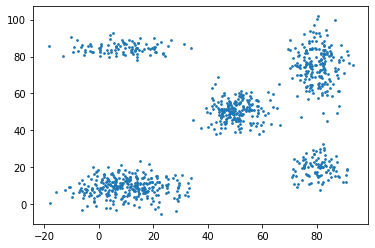

In [5]:
plt.figure()
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], s=3)

## Implementation

A human can with an ease find five distinct clusters just by watching the plot. A computer, however, needs to be told how to find the clusters.

**Exercise:**

Implement the k-means clustering algorithm.

* Use the Euclidean (L<sub>2</sub>) distance.
* It is sufficient to use the basic Python constructs in your implementation, even though we heavily rely on Numpy throughout this assignment.

In [6]:
#takes a cluster and finds a new centroid for the given cluster
def recalculate_centroid(clusterdata):
    x_values = map(lambda coord:coord[0],clusterdata)
    x_sum = sum(list(x_values))
    new_x = x_sum / len(clusterdata)
    y_values = map(lambda coord:coord[1],clusterdata)
    y_sum = sum(list(y_values))
    new_y = y_sum / len(clusterdata)
    return [new_x,new_y]


# takes a datapoint and assigns it to the the cluster corresponding to the closest centroid
def add_to_closest_cluster(datapoint, centroids, clusters):
    index, mindistance = -1, float('inf')
    # iterate all clusters, save index if datapoint is closer to centroid for given cluster
    for i in range(len(clusters.keys())):
        distance = np.linalg.norm(datapoint-centroids[i])
        if(distance < mindistance):
            index, mindistance = i, distance
    # add the datapoint to the cluster where the distance was the shortest
    clusters[str(index)].append(datapoint)

# main algorithm, 
def calculate_kmeans(data, prev_centroids, centroids):
    if(np.array_equal(prev_centroids, centroids)):
        return centroids
    # datastructure that will contain new clusters
    clusters = {}
    for i in range(len(centroids)):
        clusters[str(i)] = []
    # iterate all datapoints
    for j in range(len(data)):
        # will update our cluster directory to subarrays centered around our given centroids
        add_to_closest_cluster(data[j], centroids, clusters)
    new_centroids = []
    # produce a neste list of new centroids, calculated by the clusters we generated above
    for k in range(len(centroids)):
        new_centroid = recalculate_centroid(clusters[str(k)])
        new_centroids.append(new_centroid)
    return calculate_kmeans(data,centroids,np.array(new_centroids))


def kmeans(data, centroids):
    """
    Function implementing the k-means clustering.
    
    :param data
        data
    :param centroids
        initial centroids
    :return
        final centroids
    """
    ### START CODE HERE ###    
    zeros = np.zeros_like(centroids)
    new_centroids = calculate_kmeans(data, zeros, centroids)
    ### END CODE HERE ###
    return new_centroids

We have prepared for you a small piece of code, so that you can test that the function works according the expectations.

c0 = [10.60838779 23.74997384]
c1 = [49.02859109 49.15205809]
c2 = [76.15408829 21.7746025 ]


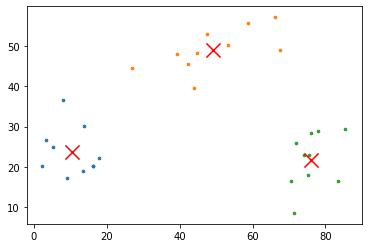

In [7]:
test_data = np.array([
    [66.24345364, 57.31053969],
    [43.88243586, 39.69929645],
    [44.71828248, 48.38791398],
    [39.27031378, 48.07972823],
    [58.65407629, 55.66884721],
    [26.98461303, 44.50054366],
    [67.44811764, 49.13785896],
    [42.38793099, 45.61070791],
    [53.19039096, 50.21106873],
    [47.50629625, 52.91407607],
    [2.29566576, 20.15837474],
    [18.01306597, 22.22272531],
    [16.31113504, 20.1897911 ],
    [13.51746037, 19.08356051],
    [16.30599164, 20.30127708],
    [5.21390499, 24.91134781],
    [9.13976842, 17.17882756],
    [3.44961396, 26.64090988],
    [8.12478344, 36.61861524],
    [13.71248827, 30.19430912],
    [74.04082224, 23.0017032 ],
    [70.56185518, 16.47750154],
    [71.26420853, 8.57481802],
    [83.46227301, 16.50657278],
    [75.25403877, 17.91105767],
    [71.81502177, 25.86623191],
    [75.95457742, 28.38983414],
    [85.50127568, 29.31102081],
    [75.60079476, 22.85587325],
    [78.08601555, 28.85141164]
])
test_centroids = np.array([
    [25, 50],
    [50, 50],
    [75, 50]
])

test_centroids = kmeans(test_data, test_centroids)

print('c0 =', test_centroids[0])
print('c1 =', test_centroids[1])
print('c2 =', test_centroids[2])
plot_clusters(test_data, test_centroids)

We expect the output to be similar to following.

```
c0 = [ 9 25]
c1 = [50 50]
c2 = [75 20]
```

If it is not the case, review your implementation, debug your algorithm, try it on paper, ...

## Clustering

Ready to run your implementation of k-means clustering on the dataset? Let's do it...

First, we need to initialize the centroids. We will go for a random initialization eventhough there are some disadvantages of doing so (see the Introduction to Data Mining from Tan et al.).

c0 = [32.  3.]
c1 = [75. 85.]
c2 = [65. 77.]
c3 = [16. 63.]
c4 = [-15.   2.]


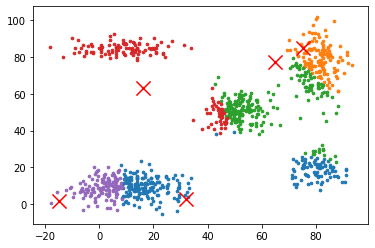

In [8]:
# Number of clusters.
K = 5

# Boundaries of our data.
x_min = np.min(synthetic_data[:, 0])
x_max = np.max(synthetic_data[:, 0])
y_min = np.min(synthetic_data[:, 1])
y_max = np.max(synthetic_data[:, 1])

# Generating random centroids within the data boundaries.
centroids = np.zeros((K, synthetic_data.shape[1]))
centroids[:, 0] = np.random.randint(x_min, x_max, size=K)
centroids[:, 1] = np.random.randint(y_min, y_max, size=K)

for i in range(len(centroids)):
    print('c%d =' % i, centroids[i])
plot_clusters(synthetic_data, centroids)

Finally, we run the `kmeans()` function you have implemented.

c0 = [80.35860123 19.92039624]
c1 = [80.01412361 75.34768277]
c2 = [50.52455759 50.55856347]
c3 = [ 8.6505037  84.62920215]
c4 = [10.27529575  9.31284683]


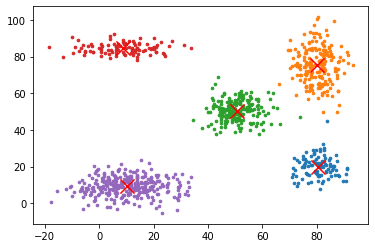

In [9]:
centroids = kmeans(synthetic_data, centroids)

# plt.scatter(data[:, 0], data[:, 1], s=3)
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')

for i in range(len(centroids)):
    print('c%d =' % i, centroids[i])
plot_clusters(synthetic_data, centroids)

Congratulations! At this point, hopefully, you have found all five distinct clusters with the centroids aligned in their centers.

## Evaluation of Clustering

Silhouette Coefficient is an example of a measure for validation of the cluster quality.

**Exercise:**

Implement a function calculating the mean Silhouette Coefficient of all samples.

* Use the Euclidean (L<sub>2</sub>) distance.
* It is sufficient to use the basic Python constructs in your implementation, even though we heavily rely on Numpy throughout this assignment.

In [10]:
# takes in datapoints for one cluster and returns the average distance 
# from one datapoint to each other datapoint in the cluster
def avg_internal_cluster_distance(int_datapoint, cluster):
    total_distance = 0
    # even though we have a duplicate comparison within the cluster
    # it is fine because the distance should be zero
    for i in range(len(cluster)):
        total_distance += np.linalg.norm(int_datapoint-cluster[i])
    # we did "i" iterations, but we intend to make "i-1" comparisons
    comparisons = len(cluster)-1
    return total_distance / comparisons

# takes in the datapoint we want to check and returns the average distance to another, given, cluster 
def avg_external_cluster_distance(ext_datapoint, cluster):
    total_distance = 0
    for i in range(len(cluster)):
        total_distance += np.linalg.norm(ext_datapoint-cluster[i])
    return total_distance / len(cluster)

# takes in the datapoint we want to check and returns the minimum avg. distance to another cluster
def min_avg_ext_clus_dist(datapoint, clusterindex, clusters):
    min_distance = float('inf')
    for i in range(len(clusters.items())):
        # we don't want to check distances within the cluster the datapoint is contained in
        if(i==clusterindex):
            None
        else:
            distance = avg_external_cluster_distance(datapoint, clusters[str(i)])
            if(distance < min_distance):
                min_distance = distance
    return min_distance
            

def silhouette_score(data, centroids):
    """
    Function implementing the k-means clustering.
    
    :param data
        data
    :param centroids
        centroids
    :return
        mean Silhouette Coefficient of all samples
    """
    ### START CODE HERE ### 
    
    # datastructure that will contain new clusters
    clusters = {}
    for i in range(len(centroids)):
        clusters[str(i)] = []
    # iterate all datapoints
    for j in range(len(data)):
        # will update our cluster directory to subarrays centered around our given centroids
        add_to_closest_cluster(data[j], centroids, clusters)
        # calculate avg. distance from centroid to datapoints
        
    # we will put the silhouett coeffisient for every datapoint in this list
    # then later take the average to get the mean coeffisient of all points
    s_coeffs = []
    # iterates through all clusters
    for k in range(len(centroids)):
        # iterates through all datapoints in a cluster
        for l in range(len(clusters[str(k)])):
            a = avg_internal_cluster_distance(clusters[str(k)][l],clusters[str(k)])
            b = min_avg_ext_clus_dist(clusters[str(k)][l], k, clusters)
            s_coeff = (b-a)/max(a,b)
            s_coeffs.append(s_coeff)
    # calculating the mean coeffisient of all points
    score = sum(s_coeffs)/len(s_coeffs)
    ### END CODE HERE ### 
    return score

First, let's see if the algorithm executes on the test data.

In [11]:
silhouette_score(test_data, test_centroids)

0.6752214860168544

We expect the output to be around `0.675`.

Finally, let's cluster again our synthetic data and calculate the Silhouette Coefficient.

silhouette_coefficient = 0.5111831867117133


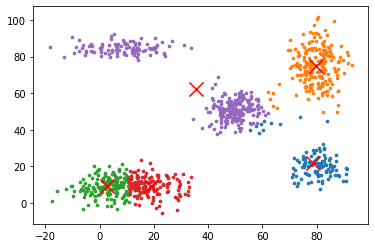

In [12]:
centroids = np.zeros((K, synthetic_data.shape[1]))
centroids[:, 0] = np.random.randint(x_min, x_max, size=K)
centroids[:, 1] = np.random.randint(y_min, y_max, size=K)

centroids = kmeans(synthetic_data, centroids)
silhouette_coefficient = silhouette_score(synthetic_data, centroids)

print('silhouette_coefficient =', silhouette_coefficient)
plot_clusters(synthetic_data, centroids)

**Exercise:**

* Run the clustering multiple times and pay attention to the results.
* In the *Discussion* below, describe your observations and discuss reasons for the possibly strong or weak performance of the algorithm. If you identify any weaknesses, suggest a possible solution.

## Discussion

<span style="color: red;">*Place for your discussion.*</span>

discussion:

Jeg opplever at algoritmen er heldig og har gode centroider i utgangspunktet så greier vi å finne alle klyngene og ender med en silhuett-koeffisient på ca. 0,733. Jeg opplever at algoritmen oftere ikke finner de "riktige" klyngene. I de gangene vi har sub-optimale klynginger liker s-koeffisienten rundt 0,50 - 0,65. Det er et åpentbart problem at vi må være "heldige" men våre initial noder for å finne de "riktige" klyngene. Bruk av K-Means++ eller Bisecting K-Means vil hjelpe på dette problemet.

2] b) You are given a two-dimensional dataset shown in Table 1. Perform HAC (for both MINlink
and MAX-link) and present the results in the form of dendrogram. Use the Euclidean
distance. Describe thoroughly the process and the outcome of each step.

In [13]:
# Defining the points that we are going to work with
A = [4,3]
B = [5,8]
C = [5,7]
D = [9,3]
E = [11,6]
F = [13,8]

def first_distance_matrix(dataset):
    distance_matrix = []
    for i in range(len(dataset)):
        row = []
        point = np.array(dataset[i])
        for j in range(len(dataset)):
            if(i==j):
                row.append(float('inf'))
            else:
                comp_point = np.array(dataset[j])
                distance = np.linalg.norm(point-comp_point)
                row.append(distance)
        distance_matrix.append(row)
    return distance_matrix

# List of lists containing all points (clusters)
first_clusters = [A,B,C,D,E,F]
dm1 = first_distance_matrix(first_clusters)
print("distance matrix:")
print(np.matrix(dm1))
print()
# we see from the matrix that cluster B and C is four our first step is closest with an euclidean distance of 1.0

distance matrix:
[[        inf  5.09901951  4.12310563  5.          7.61577311 10.29563014]
 [ 5.09901951         inf  1.          6.40312424  6.32455532  8.        ]
 [ 4.12310563  1.                 inf  5.65685425  6.08276253  8.06225775]
 [ 5.          6.40312424  5.65685425         inf  3.60555128  6.40312424]
 [ 7.61577311  6.32455532  6.08276253  3.60555128         inf  2.82842712]
 [10.29563014  8.          8.06225775  6.40312424  2.82842712         inf]]



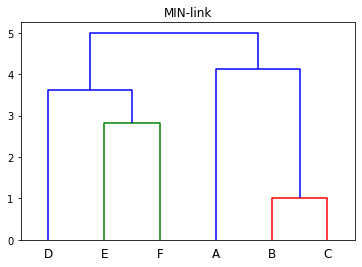

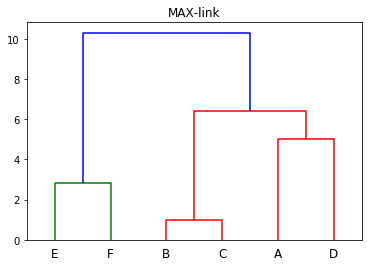

In [14]:
from scipy.cluster import hierarchy

A = [4,3]
B = [5,8]
C = [5,7]
D = [9,3]
E = [11,6]
F = [13,8]

points = [A, B, C, D, E, F]

distances = np.asarray(points)
Z = hierarchy.linkage(distances, 'single')
plt.figure()
plt.title("MIN-link")
dn = hierarchy.dendrogram(Z, labels=["A", "B", "C", "D", "E", "F"])
plt.savefig('Min-Link')
plt.show()


distances = np.asarray(points)
Z = hierarchy.linkage(distances, 'complete')
plt.figure()
plt.title("MAX-link")
dn = hierarchy.dendrogram(Z, labels=["A", "B", "C", "D", "E", "F"])
plt.savefig('Max-Link')
plt.show()

In [25]:
# Datapoints
P_1 = [1,1]
P_2 = [14,8]
P_3 = [6,12]
P_4 = [3,1]
P_5 = [5,11]
P_6 = [13,6]
P_7 = [4,12]
P_8 = [12,8]
P_9 = [1,3]
P_10 = [8,1]
P_11 = [5,9]
P_12 = [10,12]
P_13 = [14,5]
P_14 = [2,4]
P_15 = [8,6]
P_16 = [4,3]
P_17 = [12,5]
P_18 = [14,14]

def distance_matrix(dataset):
    distance_matrix = []
    for i in range(len(dataset)):
        row = []
        point = np.array(dataset[i])
        for j in range(len(dataset)):
            comp_point = np.array(dataset[j])
            distance = np.linalg.norm(point-comp_point)
            row.append(distance)
        distance_matrix.append(row)
    return distance_matrix

def identify_border_points(prox_list, dist_matrix, eps):
    border_list = []
    for i in range(len(dist_matrix)):
        # if we know the point is a core point we don't need to check
        if(prox_list[i]>=3):
            border_list.append('C')
        else:
            counter = 0
            for j in range(len(dist_matrix)):
                if(prox_list[j]<3):
                    None
                else:
                    if(dist_matrix[i][j] <= eps):
                        counter += 1
            border_list.append(counter)
    return border_list
        

def proximity_list(matrix, eps):
    prox_list = []
    for row in matrix:
        counter = 0
        for col in row:
            if(col <= eps):
                counter += 1
        prox_list.append(counter)
    return prox_list



eps = 2

all_points = [P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,P_11,P_12,P_13,P_14,P_15,P_16,P_17,P_18]
dm2 = distance_matrix(all_points)
#print("distance matrix:")
#print(np.matrix(dm2))
#print()

prox_list = proximity_list(dm2, eps)
print(prox_list)
print()

# prox list produces [3, 2, 3, 2, 4, 3, 3, 2, 3, 1, 2, 1, 3, 2, 1, 1, 3, 1]

# from looking at the proximity list we have P_1, P_3, P_5, P_6, P_7, P_9, P_13 and P_17 
# that have 3 nodes within the proximity required by the given eps (eps=2)

bord_list = identify_border_points(prox_list,dm2, eps)
print(bord_list)
print()

# border list produces ['C', 0, 'C', 1, 'C', 'C', 'C', 0, 'C', 0, 1, 0, 'C', 1, 0, 0, 'C', 0]
# this leaves P_4, P_11 & P_14 as border points

# this means that P_2, P8, P_10, P_12, P_15, P_16 & P_18 are noice points

noiceless_list = [P_1, P_3, P_4, P_5, P_6, P_7, P_9, P_11, P_13, P_14, P_17]


dm3 = distance_matrix(noiceless_list)
print("distance matrix for core points and border points:")
print(np.matrix(dm3))
print()
# first row (P_1) gives the connections P_1-P_4-P_9
# second row (P_3) gives the connections P_3-P_5-P_7
# third row (P_4) gives no new connections
# fourth row (P_5) gives a new connection in P_5-P_11, transitively giving us the cluster P_3-P_5-P_7-P_11
# fifth row (P_6) gives P_6-P_13-P_17
# sixth row (P_7) gives no new connections
# seventh row (P_9) gives a new connection in P_14, transitively giving us the cluster P_1-P_4-P_9-P_14
# eight row (P_11) gives no new connections
# ninth row (P_13) gives no new connections
# tenth row (P_14) gives no new connections

# we end up with the clusters {P_1-P_4-P_9-P_14}, {P_3-P_5-P_7-P_11}, {P_6-P_13-P_17}

[3, 2, 3, 2, 4, 3, 3, 2, 3, 1, 2, 1, 3, 2, 1, 1, 3, 1]

['C', 0, 'C', 1, 'C', 'C', 'C', 0, 'C', 0, 1, 0, 'C', 1, 0, 0, 'C', 0]

distance matrix for core points and border points:
[[ 0.         12.08304597  2.         10.77032961 13.         11.40175425
   2.          8.94427191 13.60147051  3.16227766 11.70469991]
 [12.08304597  0.         11.40175425  1.41421356  9.21954446  2.
  10.29563014  3.16227766 10.63014581  8.94427191  9.21954446]
 [ 2.         11.40175425  0.         10.19803903 11.18033989 11.04536102
   2.82842712  8.24621125 11.70469991  3.16227766  9.8488578 ]
 [10.77032961  1.41421356 10.19803903  0.          9.43398113  1.41421356
   8.94427191  2.         10.81665383  7.61577311  9.21954446]
 [13.          9.21954446 11.18033989  9.43398113  0.         10.81665383
  12.36931688  8.54400375  1.41421356 11.18033989  1.41421356]
 [11.40175425  2.         11.04536102  1.41421356 10.81665383  0.
   9.48683298  3.16227766 12.20655562  8.24621125 10.63014581]
 [ 2.         1